#PhlyGreen Tutorial 

Import packages

In [1]:
import sys
sys.path.insert(0,'../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt

Create instances of subsystems. Each one of those requires an Aircraft object as argument. By passing (None) as argument, we are creating empty objects (for the moment).

In [2]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)

Create instance of Aircraft object.

In [3]:
myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake)

Create the connections with its subsystems.

In [4]:
powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft

Define input dictionaries

In [5]:
ConstraintsInput = {'Cruise': {'Speed': 115, 'Speed Type':'TAS', 'Beta': 1., 'Altitude': 3000.},
         'AEO Climb': {'Speed': 1.2*34.5, 'Speed Type':'TAS', 'Beta': 1., 'Altitude': 0., 'ROC': 8},
         'OEI Climb': {'Speed': 1.2*34.5, 'Speed Type': 'TAS', 'Beta':1., 'Altitude': 0., 'Climb Gradient': 0.021},
         'Take Off': {'Speed': 1.2*34.5, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 0., 'kTO': 1.2, 'sTO': 793},
         'Landing':{'Speed': 34.6, 'Speed Type': 'TAS', 'Altitude': 0.},
         'Turn':{'Speed': 150, 'Speed Type': 'KCAS', 'Beta': 0.9, 'Altitude': 3000, 'Load Factor': 1.1},
         'Ceiling':{'Speed': 0.2, 'Beta': 0.8, 'Altitude': 5000, 'HT': 0.5},
         'Acceleration':{'Mach 1': 0.2, 'Mach 2':0.3, 'DT': 180, 'Altitude': 3000, 'Beta': 0.9},
         'DISA': 0}

In [6]:
MissionInput = {'Range Mission': 214,  #nautical miles
                'Range Diversion': 146,  #nautical miles
                # 'Range Loiter': 50,
                'Time Loiter': 30, #Minutes
                'Beta start': 0.97,
                'Payload Weight': 1960,  #Kg
                'Crew Weight': 0}  #Kg

In [7]:
MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': 0.0}},
                'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB':0.08, 'Speed': 1.2*34.5, 'StartAltitude': 0, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB':0.08, 'Speed': 1.2*34.5, 'StartAltitude': 1500, 'EndAltitude': 3000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.35, 'Altitude': 3000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.08, 'Speed': 1.2*34.5, 'StartAltitude': 3000, 'EndAltitude': 0}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 1.2*34.5, 'StartAltitude': 0, 'EndAltitude': 1000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.25, 'Altitude': 1000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.08, 'Speed': 1.2*34.5, 'StartAltitude': 1000, 'EndAltitude': 500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

LoiterStages = {'Cruise': {'type': 'ConstantMachCruise', 'input': {'Mach': 0.16, 'Altitude': 500}}} 

In [8]:
EnergyInput = {'Ef': 42.8*10**6,
                   'Contingency Fuel': 0,
                   'Ebat': 700 * 3600,
                   'pbat': 1000,
                   'Eta Gas Turbine': 0.21,
                   'Eta Gearbox': 1,
                   'Eta Propulsive': 0.8,
                   'Eta Electric Motor 1': 0.96,    #for serial config
                   'Eta Electric Motor 2': 0.96,    #for serial config
                   'Eta Electric Motor': 0.98,      #for parallel config
                   'Eta PMAD': 0.99,
                   'Specific Power Powertrain': [3310,7700],
                   'Specific Power PMAD': [2200,2200,2200],
                   'PowertoWeight Battery': 35, 
                   'PowertoWeight Powertrain': [150,33],
                   'PowertoWeight PMAD': 0
                   }

In [9]:
AerodynamicsInput = {'AnalyticPolar': {'type': 'Quadratic', 'input': {'AR': 9, 'e_osw': 0.63}},
                     'Take Off Cl': 1.34,
                     'Landing Cl': 2.67,
                     'Minimum Cl': 0.17,
                     'Cd0': 0.029}



Import input dictionaries

In [10]:
myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.LoiterStages = LoiterStages
myaircraft.EnergyInput = EnergyInput

Set aircraft power configuration

In [11]:
myaircraft.Configuration = 'Traditional'
myaircraft.AircraftType = 'DO228'

Set inputs

In [12]:
# Initialize Constraint Analysis
myaircraft.constraint.SetInput()

# Initialize Mission profile and Analysis
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()

# Initialize Aerodynamics subsystem
myaircraft.aerodynamics.SetInput()

# Initialize Powertrain
myaircraft.powertrain.SetInput()

# Initialize Weight Estimator
myaircraft.weight.SetInput()

500


Either run the Constraint Analysis....

In [13]:
myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ', myaircraft.DesignWTOoS)
print('Design P/W: ', myaircraft.DesignPW)
print('----------------------------------------')



----------------------------------------
Design W/S:  1955.6756756756756
Design P/W:  151.35292344762394
----------------------------------------


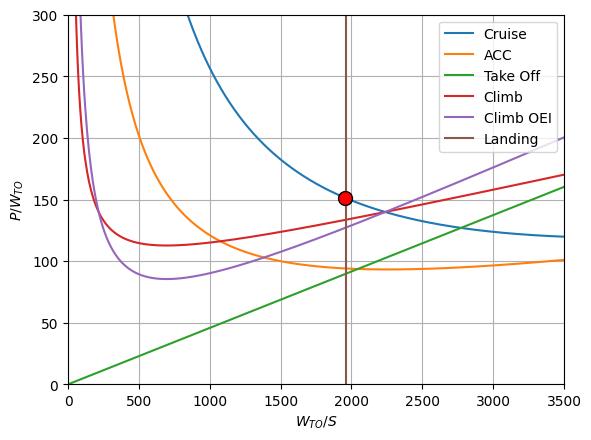

In [14]:
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCruise, label='Cruise')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAcceleration, label='ACC')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTakeOff, label='Take Off')
# plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTakeOff_Finger, label='Take Off Finger')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAEOClimb, label='Climb')
# plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWClimb_Finger, label='Climb Finger')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWOEIClimb, label='Climb OEI')
plt.plot(myaircraft.constraint.WTOoSLanding,myaircraft. constraint.PWLanding, label='Landing')
plt.plot(myaircraft.DesignWTOoS, myaircraft.DesignPW, marker='o', markersize = 10, markerfacecolor = 'red', markeredgecolor = 'black')
# plt.plot(performance.WTOoSTorenbeek, performance.PWTorenbeek, label='Torenbeek')
plt.ylim([0, 300])
plt.xlim([0, 3500])
plt.legend()
plt.grid(visible=True)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$P/W_{TO}$')
plt.show()



... or assign a wing loading

In [15]:
#myaircraft.DesignWTOoS = 3323

Run Mission analysis to define the aircraft's masses

In [16]:
myaircraft.weight.WeightEstimation()

AttributeError: 'Mission' object has no attribute 'beta_0'

Wing surface can be readily estimated as S = WTO/(WTO/S)

In [ ]:
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * 9.81

A summary of the preliminary design:

In [ ]:
print('Fuel mass (trip + altn + loiter) [Kg]: ', myaircraft.weight.Wf)
print('Block Fuel mass [Kg]:         ', myaircraft.weight.Wf + myaircraft.weight.final_reserve)
print('Structure [Kg]:               ', myaircraft.weight.WStructure)
print('Powertrain mass [Kg]:         ',myaircraft.weight.WPT)
print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew)
print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew  + myaircraft.weight.WPayload)
print('----------------------------------------')
print('Takeoff Weight: ', myaircraft.weight.WTO)
if myaircraft.WellToTankInput is not None:
    print('Source Energy: ', myaircraft.welltowake.SourceEnergy/1.e6,' MJ')
    print('Psi: ', myaircraft.welltowake.Psi)
print('Wing Surface: ', myaircraft.WingSurface, ' m^2')
print('TakeOff engine shaft peak power [kW]:      ', myaircraft.mission.TO_PP/1000.)
print('Climb/cruise engine shaft peak power [kW]: ', myaircraft.mission.Max_PEng/1000.)
print('Sizing phase for thermal powertrain ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PEng > myaircraft.mission.TO_PP else 'Takeoff peak power'  )

Fuel mass (trip + altn + loiter) [Kg]:  650.4004077879445
Block Fuel mass [Kg]:          675.6929426557273
Structure [Kg]:                3503.684211525002
Powertrain mass [Kg]:          289.3857782347063
Empty Weight [Kg]:             3793.0699897597083
Zero Fuel Weight [Kg]:         5753.069989759708
----------------------------------------
Takeoff Weight:  6428.7283697706425
Wing Surface:  32.247588949359454  m^2
TakeOff engine shaft peak power [kW]:       719.6213871735946
Climb/cruise engine shaft peak power [kW]:  957.8669259568779
Sizing phase for thermal powertrain  Climb/Cruise peak power


Some plots:

In [ ]:
times = np.array([])
Ef = np.array([])
Ebat = np.array([])
beta = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef = np.concatenate([Ef, array.y[0]])
    beta = np.concatenate([beta, array.y[1]])

Takeoff propulsive power

In [ ]:
myaircraft.performance.TakeOff(myaircraft.DesignWTOoS,myaircraft.constraint.TakeOffConstraints['Beta'], myaircraft.constraint.TakeOffConstraints['Altitude'],myaircraft.constraint.TakeOffConstraints['kTO'], myaircraft.constraint.TakeOffConstraints['sTO'], myaircraft.constraint.DISA, myaircraft.constraint.TakeOffConstraints['Speed'], myaircraft.constraint.TakeOffConstraints['Speed Type'])

89.55000104621966

Maximum mission Propusive Power over Takeoff Mass

In [ ]:
max([myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))])

119.19738038703622

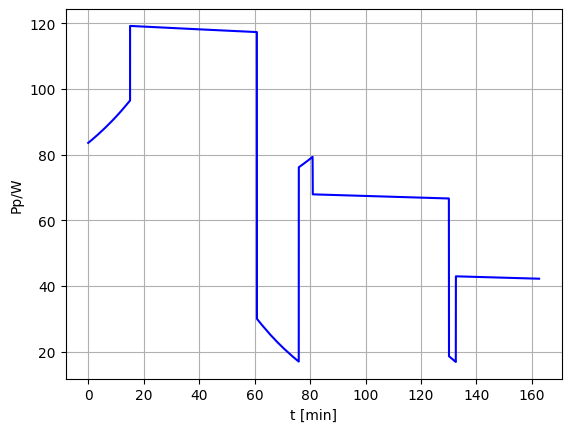

In [ ]:
plt.plot(times/60,[myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp/W')
plt.show()

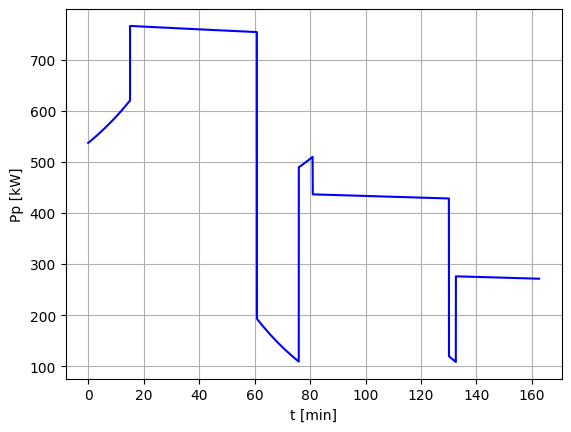

In [ ]:
plt.plot(times/60,[(myaircraft.weight.WTO/1000) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp [kW]')
plt.show()

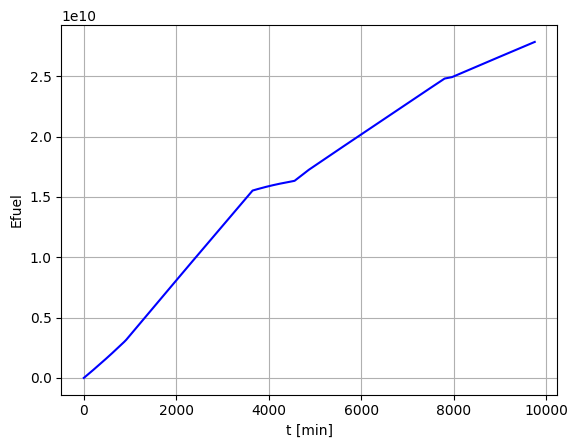

In [ ]:
plt.plot(times,Ef, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Efuel')
plt.show()

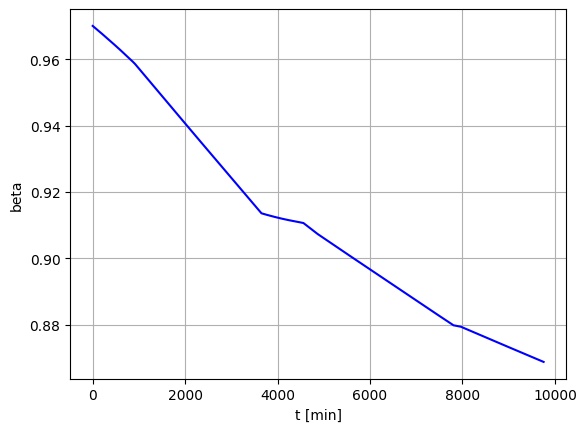

In [ ]:
plt.plot(times,beta, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('beta')
plt.show()

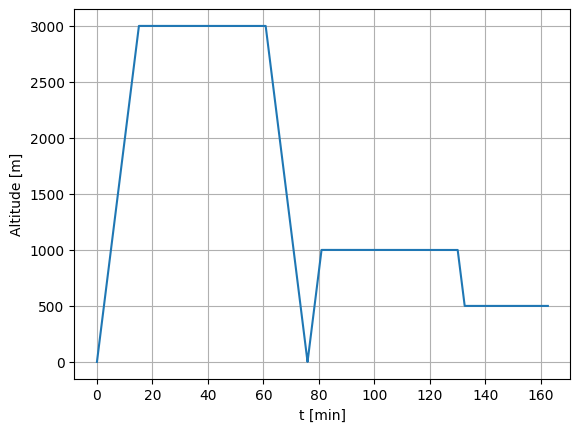

In [ ]:
plt.plot(times/60,mission.profile.Altitude(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Altitude [m]')
plt.show()

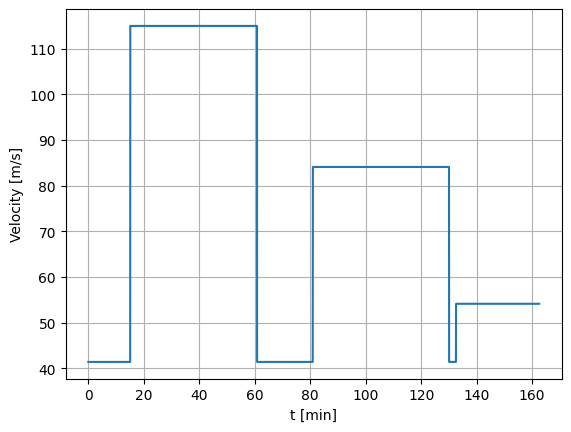

In [ ]:
plt.plot(times/60,mission.profile.Velocity(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Velocity [m/s]')
plt.show()